In [80]:
# from os import listdir
# from os.path import join as pjoin
# i
# import plotly.express as px 

#TODO: try to explore data with each variable and their combinations

# Analysis example: Source code 
# https://towardsdatascience.com/top-machine-learning-algorithms-for-classification-2197870ff501

In [81]:
from scipy.io import loadmat 
import pandas as pd 
import numpy as np


In [82]:
mat = loadmat("./data/db1000.mat")
secureConditionLabels = mat['issecure']   # 1 the load flow convergences; 0 the load flow doesnt convergence (Juan Sierra)

voltageMagnitudes = mat['VM']   # type: ndarray
voltageAngles = mat['VA']       # type: ndarray

# TODO: then
# reactiveGenerators = mat['Qgen']
# activeGenerators = mat['Pgen']

# TODO: Ask to Juan how can i interpret SLOAD?
# areactiveLoads = mat['Qload']   
# activeLoads = mat['Pload']


In [83]:
# dimensions of data
# generación vs etiqueta
# carga vs etiqueta

print('Dimensiones')
print('secureConditionLabels: ', secureConditionLabels.shape)
print('voltageMagnitudes: ', voltageMagnitudes.shape)
print('voltageAngles: ', voltageAngles.shape)

voltageMagAng = np.concatenate((voltageMagnitudes, voltageAngles), axis = 0)
print('voltage: ', voltageMagAng.shape)

Dimensiones
secureConditionLabels:  (1, 1000)
voltageMagnitudes:  (39, 1000)
voltageAngles:  (39, 1000)
voltage:  (78, 1000)


In [100]:
VM = pd.DataFrame(voltageMagnitudes)
VM.describe()

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.785801,0.784257,0.784065,0.784115,0.784058,0.784764,0.784276,0.785312,0.784684,0.783677,...,0.784065,0.784135,0.784474,0.784941,0.784949,0.784006,0.785342,0.785586,0.784700,0.784638
std,0.425434,0.424702,0.424531,0.424605,0.424508,0.424948,0.424703,0.425224,0.424851,0.424349,...,0.424548,0.424646,0.424798,0.425103,0.425072,0.424517,0.425190,0.425407,0.424937,0.424874
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.967932,0.960858,0.967218,0.969434,0.967524,0.965378,0.965476,0.967810,0.963737,0.962465,...,0.966392,0.959652,0.964185,0.966365,0.963745,0.959504,0.967955,0.967876,0.965064,0.964712
50%,1.006697,1.003285,1.001215,1.003231,1.003067,1.004246,1.003855,1.004996,1.005113,1.002504,...,1.004564,1.002851,1.004208,1.004099,1.005007,1.003992,1.004679,1.006429,1.005030,1.003591
75%,1.027800,1.027612,1.027800,1.026500,1.027800,1.027800,1.027800,1.028010,1.027800,1.027529,...,1.027800,1.027800,1.027800,1.027800,1.027905,1.027800,1.028155,1.027800,1.027800,1.027800
max,1.118742,1.171638,1.140864,1.207001,1.095520,1.196937,1.167109,1.174828,1.135450,1.204178,...,1.150163,1.211579,1.173271,1.221669,1.168545,1.159706,1.145694,1.209179,1.171100,1.189650


In [101]:
VA = pd.DataFrame(voltageAngles)
VA.describe()

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.037087,0.778914,0.589131,0.760822,0.552301,1.125016,0.837000,0.898197,1.036172,0.788992,...,0.472101,0.888979,1.095552,0.802861,1.011001,0.871382,1.037382,1.046484,0.759427,0.927279
std,11.489471,11.129029,11.445971,11.377739,11.168224,11.776869,11.996915,11.598204,11.783490,11.613967,...,11.511909,11.785836,11.485855,12.127379,12.024855,11.311943,11.976882,11.900558,10.985911,11.232067
min,-41.608860,-44.414451,-57.773197,-37.161710,-41.251162,-47.322717,-52.035599,-46.341756,-35.036449,-39.910236,...,-51.488878,-45.234584,-44.414451,-57.773197,-43.852256,-39.375909,-43.501672,-44.659254,-43.393217,-42.097017
25%,-4.248051,-4.348378,-4.607630,-4.520780,-4.696511,-4.346425,-4.748844,-4.716499,-4.289681,-5.396409,...,-4.843165,-4.743224,-4.267486,-4.702804,-4.526977,-4.851861,-4.416006,-4.193068,-4.589957,-4.349134
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.724822,5.603818,5.155683,4.873051,4.939949,6.630247,5.233539,5.405628,5.822427,5.631853,...,4.849769,5.302441,6.173771,5.365174,5.829982,5.208297,5.377155,6.069041,6.236991,5.827805
max,46.207577,45.263698,49.264645,39.806165,42.421847,47.616579,52.116817,47.958161,45.011240,48.316788,...,46.705469,48.038183,49.970605,52.455588,47.323050,45.726592,47.551510,46.566531,41.745942,48.173829


In [84]:
secureConditionLabels = secureConditionLabels.reshape((secureConditionLabels.shape[1], secureConditionLabels.shape[0]))
voltageMagnitudes = voltageMagnitudes.reshape((voltageMagnitudes.shape[1], voltageMagnitudes.shape[0]))
voltageAngles = voltageAngles.reshape((voltageAngles.shape[1], voltageAngles.shape[0]))
voltageMagAng = voltageMagAng.reshape((voltageMagAng.shape[1], voltageMagAng.shape[0]))


In [85]:
# TODO:  
# Disperse analysis


In [102]:
# Correlation matrix: Which variables or nodes influence the convergence of load flow?

# heat map   # Professor Walter
# PCA
# https://www.cienciadedatos.net/documentos/py19-pca-python.html
# para el primer pca quienes no aportan tanto, esos son los que llevan las menores influencias

# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
# import statsmodels.api as sm

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

# Preprocesado y modelado
# ==============================================================================
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')



In [111]:
# Entrenamiento modelo PCA con escalado de los datos
# ==============================================================================
datos = VM.copy()
pca_pipe = make_pipeline(StandardScaler(), PCA())   #try n_components=4
pca_pipe.fit(datos)

# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']

In [114]:
# Se combierte el array a dataframe para añadir nombres a los ejes.
indexLabel = ['PC' + str(k) for k in range(1, len(datos.columns)+1)]
pd.DataFrame(
    data    = abs(modelo_pca.components_),
    columns = datos.columns,
    index   = indexLabel
)

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
PC1,0.021595,0.091731,0.173065,0.195387,0.143926,0.036317,0.055882,0.137217,0.224675,0.262903,...,0.234694,0.137350,0.005837,0.080819,0.124343,0.178373,0.171365,0.110845,0.004478,0.055104
PC2,0.144928,0.147970,0.071700,0.037571,0.116910,0.171337,0.192307,0.188936,0.096844,0.040620,...,0.126847,0.216673,0.220961,0.181698,0.117818,0.020591,0.075956,0.153540,0.169633,0.110542
PC3,0.242611,0.109348,0.190317,0.121270,0.200166,0.087184,0.208515,0.213710,0.123624,0.203880,...,0.163937,0.174752,0.228434,0.072520,0.208522,0.065947,0.214843,0.060592,0.249369,0.046067
PC4,0.030474,0.220754,0.103421,0.190935,0.134727,0.189117,0.178421,0.170719,0.223722,0.075381,...,0.152536,0.157165,0.155443,0.271235,0.048753,0.240915,0.040417,0.211529,0.035857,0.230718
PC5,0.263853,0.182157,0.084586,0.238408,0.295092,0.201687,0.020969,0.189978,0.102239,0.046672,...,0.102875,0.059446,0.082744,0.216178,0.219919,0.089091,0.204506,0.348347,0.202037,0.014714
PC6,0.005940,0.203770,0.365008,0.175720,0.095442,0.233073,0.183670,0.101422,0.075323,0.109431,...,0.062427,0.129765,0.159391,0.015777,0.194866,0.291931,0.252538,0.081325,0.198752,0.271312
PC7,0.223111,0.295214,0.129331,0.203490,0.294241,0.100029,0.003492,0.047433,0.001868,0.214779,...,0.230494,0.034765,0.079119,0.007537,0.091322,0.286237,0.250749,0.105666,0.250561,0.256023
PC8,0.240717,0.116553,0.003837,0.217599,0.062195,0.156798,0.063943,0.085604,0.187497,0.119335,...,0.092519,0.155533,0.099273,0.024841,0.201317,0.111842,0.144233,0.054881,0.210384,0.189903
PC9,0.094883,0.142536,0.193296,0.035032,0.034539,0.190626,0.202101,0.079963,0.132630,0.071455,...,0.027436,0.155380,0.062834,0.223146,0.129372,0.053421,0.065859,0.174705,0.123666,0.185104
PC10,0.231679,0.163272,0.082238,0.018507,0.245216,0.213628,0.102347,0.252780,0.171541,0.046168,...,0.017355,0.154705,0.282833,0.078565,0.172171,0.240943,0.044964,0.063103,0.171280,0.226864


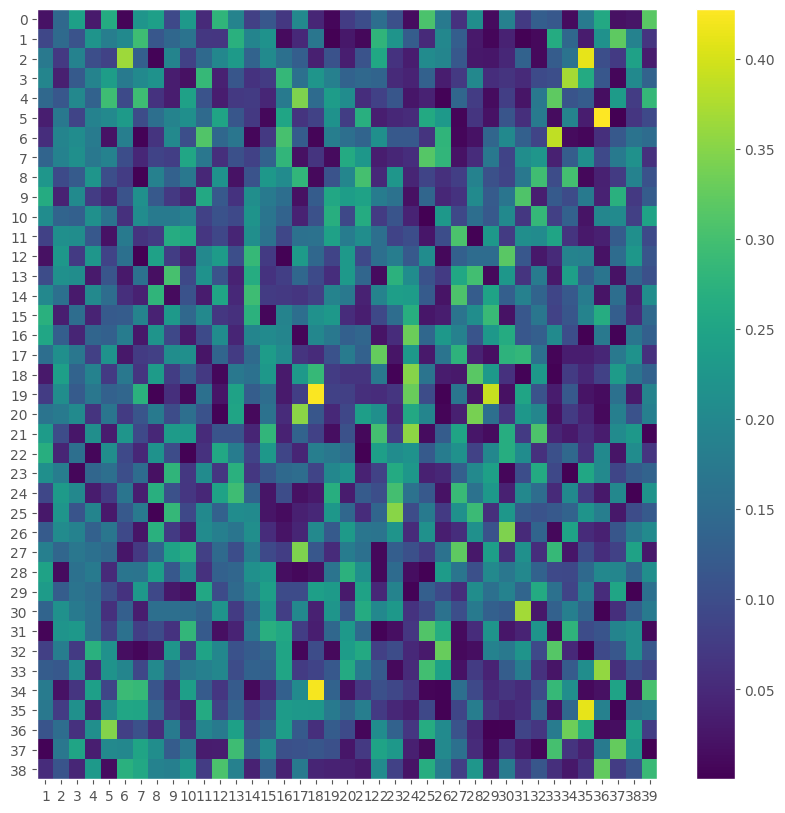

In [115]:
# Heatmap componentes
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
componentes = abs(modelo_pca.components_)
plt.imshow(componentes.T, cmap='viridis', aspect='auto')
plt.yticks(range(len(datos.columns)), datos.columns)
plt.xticks(range(len(datos.columns)), np.arange(modelo_pca.n_components_) + 1)
plt.grid(False)
plt.colorbar();

# Node 
        #PCA
        
        # los más oscuros no tienen casi influencia en la variación del PCA

In [96]:
# Lasso regresion: Which variables or nodes influence the convergence of load flow?
#TODO: create function to identify nodes that dont influence convergence of load flow

alphaLasso = 0.09

from sklearn import linear_model
clfVoltageMagnitude = linear_model.Lasso(alpha=alphaLasso)
clfVoltageMagnitude.fit(voltageMagnitudes, secureConditionLabels)

print(clfVoltageMagnitude.coef_)

print(clfVoltageMagnitude.intercept_)

# TODO: Graficar este como mapa de calor, ver ejemplo de iris

# TODO: LogisticRegression


[-0. -0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0.  0. -0.  0.  0. -0.
 -0.  0.  0. -0. -0. -0.  0.  0.  0.  0.  0.  0. -0. -0.  0. -0.  0.  0.
  0.  0. -0.]
[0.774]


In [97]:
clfVoltageAngle= linear_model.Lasso(alpha=alphaLasso)
clfVoltageAngle.fit(voltageAngles, secureConditionLabels)

print(clfVoltageAngle.coef_)

print(clfVoltageAngle.intercept_)

[-3.42421873e-04  1.25650776e-03  0.00000000e+00 -9.78890212e-04
 -0.00000000e+00  4.71080294e-05 -0.00000000e+00  3.37496827e-03
 -1.99001075e-03 -3.08960365e-04 -0.00000000e+00  1.00769912e-03
  0.00000000e+00  1.24194671e-03  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.99951790e-03  5.16346237e-04
 -6.37120190e-05 -1.43622206e-03 -0.00000000e+00  0.00000000e+00
  1.65012237e-04  0.00000000e+00  3.92582792e-04  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -5.37740742e-04
  4.33675980e-04  0.00000000e+00  3.69942745e-04 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00]
[0.77274298]


In [98]:
clfVoltage= linear_model.Lasso(alpha=alphaLasso)
clfVoltage.fit(voltageMagAng, secureConditionLabels)

print(clfVoltage.coef_)

print(clfVoltage.intercept_)

[-0.         -0.          0.00015457 -0.         -0.          0.
  0.00190398  0.         -0.          0.         -0.          0.
  0.         -0.00074742 -0.00116425 -0.          0.         -0.
 -0.00095026 -0.00100398  0.         -0.00075555  0.00010055  0.
  0.          0.          0.          0.00043595  0.00220225 -0.00065329
  0.         -0.          0.         -0.          0.00222925  0.
 -0.          0.          0.00128572  0.         -0.00058395 -0.
 -0.         -0.         -0.         -0.          0.          0.0008058
 -0.00034568  0.         -0.         -0.          0.         -0.00048116
 -0.00041935  0.          0.00130411 -0.          0.00012628 -0.
 -0.0029734  -0.         -0.          0.         -0.         -0.
 -0.00095194  0.          0.         -0.          0.         -0.
 -0.00112889  0.         -0.          0.          0.          0.        ]
[0.77473689]


In [90]:
# Supervised analysis 



In [91]:
# unsupervised analysis


(1000, 78)